### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv(r"C:\Users\prapt\Downloads\archive (10)\US_Accidents_March23.csv")
df = df.sample(n = 5000, random_state = 42)
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7133276,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
5363845,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
155993,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1861414,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2021359,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648510,A-658190,Source2,2,2022-04-07 11:49:50,2022-04-07 12:41:08,42.605862,-71.568428,NaN,NaN,0.000,...,False,False,True,False,False,False,Day,Day,Day,Day
2464122,A-2473994,Source2,2,2018-11-22 10:30:51,2018-11-22 11:00:37,35.223427,-80.738495,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
445117,A-445130,Source2,2,2017-05-19 15:59:40,2017-05-19 16:44:24,41.846104,-87.972191,NaN,NaN,0.020,...,False,False,False,False,True,False,Day,Day,Day,Day
3796648,A-3825087,Source1,2,2022-04-13 07:24:00,2022-04-13 09:23:28,34.307396,-117.469830,34.295824,-117.455404,1.148,...,False,False,False,False,False,False,Day,Day,Day,Day


### Basic Dataset Exploration

In [6]:
df.shape

(5000, 46)

In [12]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5000.000000,5000.000000,5000.000000,2774.000000,2774.000000,5000.000000,4887.000000,3654.000000,4879.000000,4910.000000,4885.000000,4607.000000,3509.000000
mean,2.216600,36.214003,-94.646404,36.176989,-95.550670,0.571879,61.480520,57.989600,64.577782,29.543711,9.165425,7.714000,0.006603
std,0.489216,5.033467,17.325792,5.228004,18.090471,1.672596,19.553105,23.211788,22.827581,1.000824,3.219773,5.475778,0.041607
min,1.000000,25.232961,-124.384621,25.231069,-124.396041,0.000000,-21.000000,-36.000000,4.000000,19.920000,0.000000,0.000000,0.000000
25%,2.000000,33.383406,-117.171323,33.346923,-117.654803,0.000000,48.900000,42.000000,48.000000,29.380000,10.000000,4.600000,0.000000
50%,2.000000,35.874192,-87.868599,36.183922,-88.033840,0.027000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.075297,-80.386482,40.075331,-80.258405,0.477000,76.000000,76.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.759510,-70.119828,48.596557,-70.119828,55.312000,114.000000,114.000000,100.000000,30.760000,80.000000,126.600000,1.080000


### Missing Value Analysis

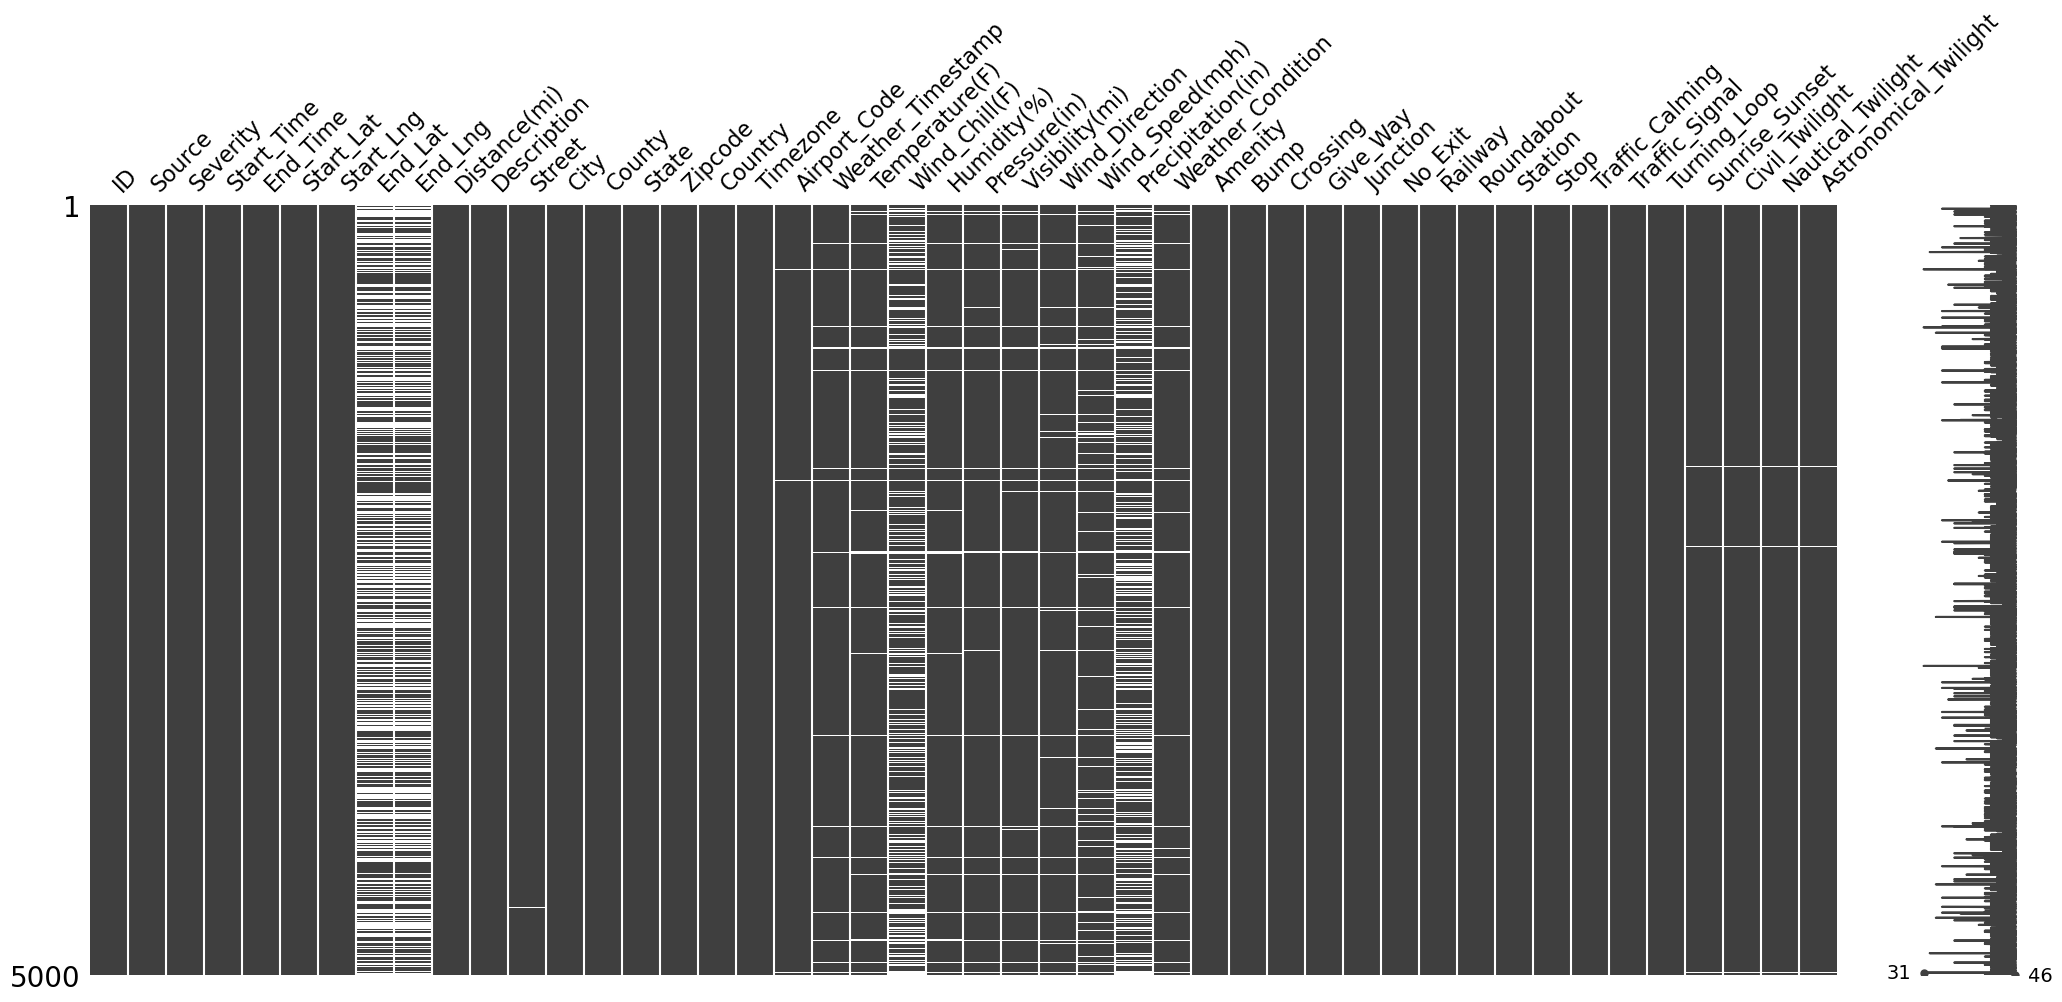

End_Lat                  44.52
End_Lng                  44.52
Precipitation(in)        29.82
Wind_Chill(F)            26.92
Wind_Speed(mph)           7.86
Wind_Direction            2.58
Humidity(%)               2.42
Visibility(mi)            2.30
Weather_Condition         2.28
Temperature(F)            2.26
Pressure(in)              1.80
Weather_Timestamp         1.52
Airport_Code              0.38
Sunrise_Sunset            0.32
Civil_Twilight            0.32
Nautical_Twilight         0.32
Astronomical_Twilight     0.32
Street                    0.14
Timezone                  0.10
dtype: float64

In [19]:
msno.matrix(df)
plt.show()

# Check missing percentage
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

### Temporal Analysis (Time of Day)

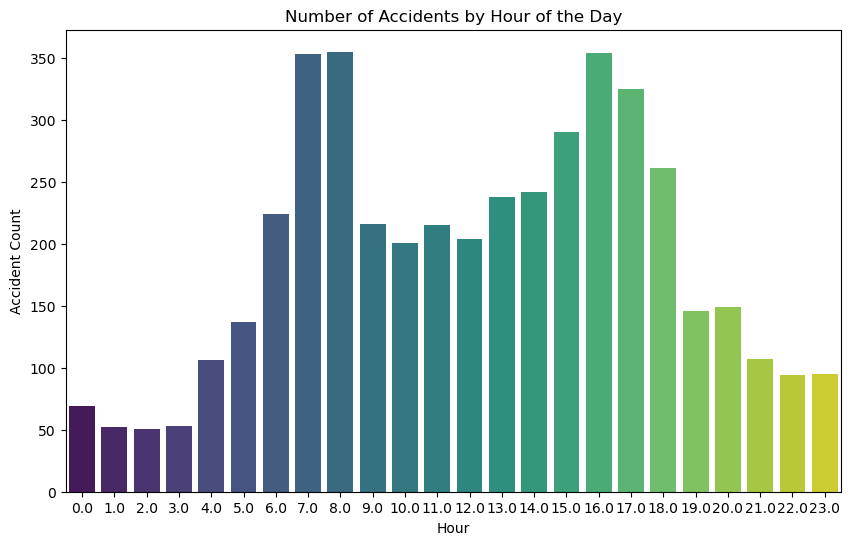

In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract hour and plot
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.show()

### Weather Condition Impact

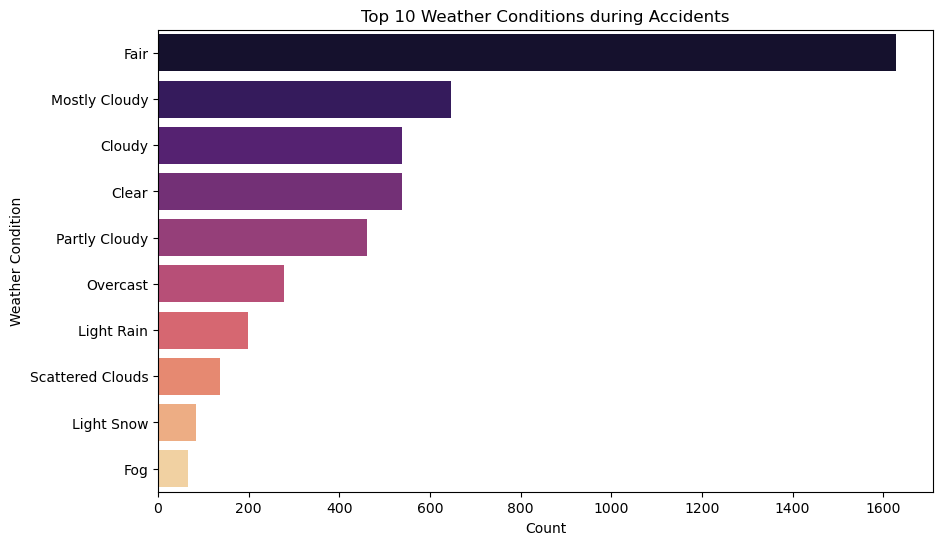

In [24]:
top_weather = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_weather.values, y=top_weather.index, palette='magma')
plt.title("Top 10 Weather Conditions during Accidents")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()


### Road Condition (Visibility, Wind, etc.)

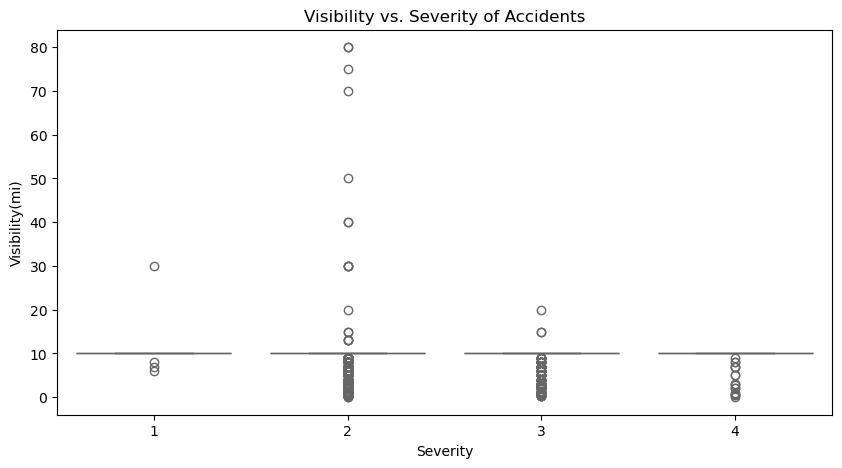

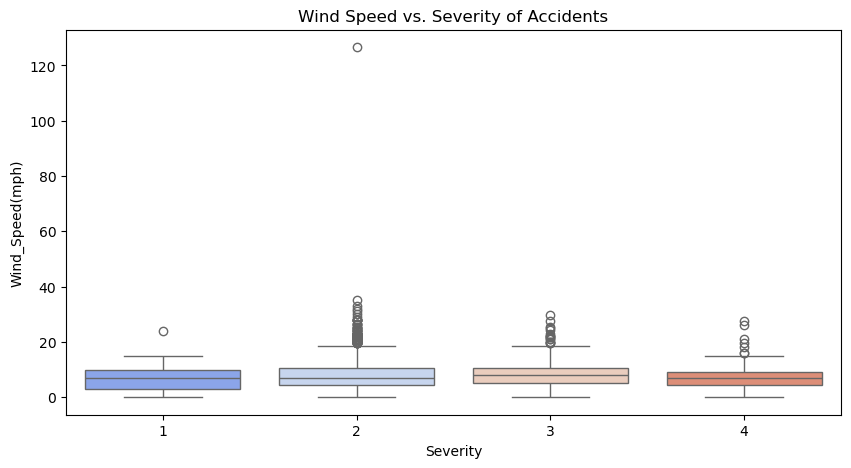

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Severity', y='Visibility(mi)', palette='coolwarm')
plt.title("Visibility vs. Severity of Accidents")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Severity', y='Wind_Speed(mph)', palette='coolwarm')
plt.title("Wind Speed vs. Severity of Accidents")
plt.show()

### Accident Hotspots (Using Heatmap)

In [63]:
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(5000)

heatmap_map = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=5)
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']], radius=8).add_to(heatmap_map)
heatmap_map.save("accident_hotspots_map.html")

In [65]:
from IPython.display import display

display(heatmap_map)

### Feature Selection and Preprocessing

In [35]:
# Check for target and feature columns
print("Target (Severity) value counts:\n", df['Severity'].value_counts())

# Drop columns that won't help with prediction or cause data leakage
df_model = df.copy()
df_model = df_model.drop(columns=[
    'ID', 'Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
    'End_Time', 'Description', 'Number', 'Street', 'Zipcode', 
    'City', 'County', 'Country', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Wind_Chill(F)', 'Nautical_Twilight', 
    'Astronomical_Twilight', 'Civil_Twilight'
], errors='ignore')


Target (Severity) value counts:
 Severity
2    3956
3     870
4     129
1      45
Name: count, dtype: int64


### Handling Missing Values

In [38]:
# Drop rows with missing target
df_model = df_model.dropna(subset=['Severity'])

# Drop or fill NA values for simplicity (you can use imputation too)
df_model = df_model.dropna()


In [40]:
# Convert datetime to useful features
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract time-based features
df['hour'] = df['Start_Time'].dt.hour
df['dayofweek'] = df['Start_Time'].dt.dayofweek
df['month'] = df['Start_Time'].dt.month
df['is_weekend'] = df['Start_Time'].dt.dayofweek >= 5

# Drop original datetime column
df.drop(['Start_Time'], axis=1, inplace=True)


In [53]:
# Option 1: Drop datetime columns
X_train = X_train.select_dtypes(exclude=['datetime64[ns]', 'datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64[ns]', 'datetime64'])

# Then proceed with fitting
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Encode Categorical Features

In [45]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
cat_cols = df_model.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])


### Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns='Severity')
y = df_model['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### Evaluate Model

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.86      0.97      0.91       502
           3       0.43      0.18      0.25        72
           4       0.00      0.00      0.00        12

    accuracy                           0.84       595
   macro avg       0.32      0.29      0.29       595
weighted avg       0.78      0.84      0.80       595



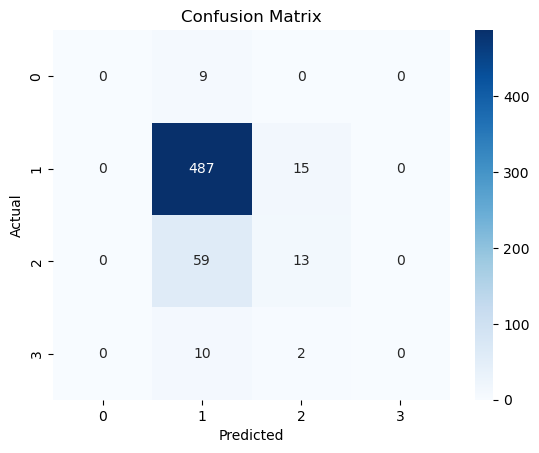

In [58]:
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
